# Modelagem Preditiva com Linguagem Python e TensorFlow

## Carregando Pacotes

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import ssl
from plot_model import plot_model

## Carregando os Dados

In [2]:
# Download dos dados
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [3]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [4]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [5]:
# Shape
dataset.shape

(506, 14)

In [6]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# Split dos dados. Os dados foram divididos em treino e teste na proporção 80/20.
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

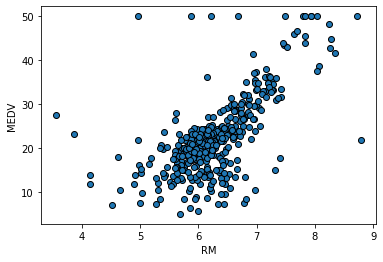

In [8]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [9]:
# Divisão de x e y
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

In [10]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

In [11]:
# Cria o modelo 
modelo = modelo_linear()
modelo

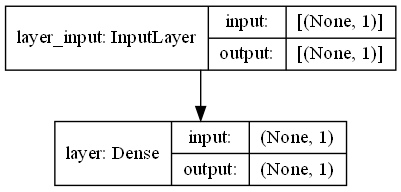

In [12]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

### Treinamento do Modelo

In [13]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [14]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [15]:
# Lista para as previsões
predictions_list = []

In [16]:
# Caminho para salvar o checkpoint
checkpoint_path = "dados/"

In [17]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [18]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [19]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 1s 300ms/step - loss: 1119.4229 - mae: 32.0776 - mse: 1119.4229 - val_loss: 1232.9384 - val_mae: 33.3894 - val_mse: 1232.9384
Epoch 2/4000
2/2 [==============================] - 0s 36ms/step - loss: 1109.8804 - mae: 31.9322 - mse: 1109.8804 - val_loss: 1223.0625 - val_mae: 33.2435 - val_mse: 1223.0625
Epoch 3/4000
2/2 [==============================] - 0s 42ms/step - loss: 1100.4097 - mae: 31.7869 - mse: 1100.4097 - val_loss: 1213.2277 - val_mae: 33.0976 - val_mse: 1213.2277
Epoch 4/4000
2/2 [==============================] - 0s 40ms/step - loss: 1091.1130 - mae: 31.6418 - mse: 1091.1130 - val_loss: 1203.4440 - val_mae: 32.9518 - val_mse: 1203.4440
Epoch 5/4000
2/2 [==============================] - 0s 31ms/step - loss: 1081.6488 - mae: 31.4964 - mse: 1081.6489 - val_loss: 1193.7195 - val_mae: 32.8063 - val_mse: 1193.7195
Epoch 6/4000
2/2 [==============================] - 0s 31ms/step - loss: 1072.4261 - mae: 31.3516 - mse: 1072.4261

Epoch 48/4000
2/2 [==============================] - 0s 30ms/step - loss: 730.7441 - mae: 25.4714 - mse: 730.7441 - val_loss: 827.8486 - val_mae: 26.7668 - val_mse: 827.8486
Epoch 49/4000
2/2 [==============================] - 0s 26ms/step - loss: 723.7375 - mae: 25.3376 - mse: 723.7375 - val_loss: 820.5528 - val_mae: 26.6325 - val_mse: 820.5528
Epoch 50/4000
2/2 [==============================] - 0s 30ms/step - loss: 716.8339 - mae: 25.2038 - mse: 716.8339 - val_loss: 813.2927 - val_mae: 26.4983 - val_mse: 813.2927
Epoch 51/4000
2/2 [==============================] - 0s 28ms/step - loss: 709.9918 - mae: 25.0702 - mse: 709.9918 - val_loss: 806.0786 - val_mae: 26.3643 - val_mse: 806.0786
Epoch 52/4000
2/2 [==============================] - 0s 28ms/step - loss: 703.1245 - mae: 24.9368 - mse: 703.1245 - val_loss: 798.9207 - val_mae: 26.2306 - val_mse: 798.9207
Epoch 53/4000
2/2 [==============================] - 0s 29ms/step - loss: 696.3905 - mae: 24.8039 - mse: 696.3905 - val_loss: 791.

2/2 [==============================] - 0s 27ms/step - loss: 453.6908 - mae: 19.4609 - mse: 453.6908 - val_loss: 536.1323 - val_mae: 20.7419 - val_mse: 536.1323
Epoch 96/4000
2/2 [==============================] - 0s 31ms/step - loss: 448.7612 - mae: 19.3384 - mse: 448.7612 - val_loss: 530.9670 - val_mae: 20.6196 - val_mse: 530.9670
Epoch 97/4000
2/2 [==============================] - 0s 29ms/step - loss: 443.9453 - mae: 19.2166 - mse: 443.9453 - val_loss: 525.8438 - val_mae: 20.4976 - val_mse: 525.8438
Epoch 98/4000
2/2 [==============================] - 0s 28ms/step - loss: 439.1547 - mae: 19.0949 - mse: 439.1547 - val_loss: 520.7667 - val_mae: 20.3759 - val_mse: 520.7667
Epoch 99/4000
2/2 [==============================] - 0s 29ms/step - loss: 434.4687 - mae: 18.9742 - mse: 434.4687 - val_loss: 515.7384 - val_mae: 20.2547 - val_mse: 515.7384
Epoch 100/4000
2/2 [==============================] - 0s 39ms/step - loss: 429.7297 - mae: 18.8535 - mse: 429.7297 - val_loss: 510.7713 - val_ma

Epoch 142/4000
2/2 [==============================] - 0s 29ms/step - loss: 265.1198 - mae: 14.0569 - mse: 265.1198 - val_loss: 334.6474 - val_mae: 15.3350 - val_mse: 334.6474
Epoch 143/4000
2/2 [==============================] - 0s 30ms/step - loss: 261.9684 - mae: 13.9516 - mse: 261.9684 - val_loss: 331.2110 - val_mae: 15.2303 - val_mse: 331.2110
Epoch 144/4000
2/2 [==============================] - 0s 30ms/step - loss: 258.8030 - mae: 13.8461 - mse: 258.8030 - val_loss: 327.8038 - val_mae: 15.1258 - val_mse: 327.8038
Epoch 145/4000
2/2 [==============================] - 0s 30ms/step - loss: 255.7267 - mae: 13.7413 - mse: 255.7267 - val_loss: 324.4231 - val_mae: 15.0213 - val_mse: 324.4231
Epoch 146/4000
2/2 [==============================] - 0s 28ms/step - loss: 252.6038 - mae: 13.6371 - mse: 252.6038 - val_loss: 321.0806 - val_mae: 14.9172 - val_mse: 321.0806
Epoch 147/4000
2/2 [==============================] - 0s 32ms/step - loss: 249.5884 - mae: 13.5338 - mse: 249.5884 - val_loss

Epoch 189/4000
2/2 [==============================] - 0s 34ms/step - loss: 148.3017 - mae: 9.7010 - mse: 148.3017 - val_loss: 206.4705 - val_mae: 11.1498 - val_mse: 206.4705
Epoch 190/4000
2/2 [==============================] - 0s 37ms/step - loss: 146.4749 - mae: 9.6235 - mse: 146.4749 - val_loss: 204.4201 - val_mae: 11.0774 - val_mse: 204.4201
Epoch 191/4000
2/2 [==============================] - 0s 31ms/step - loss: 144.6396 - mae: 9.5453 - mse: 144.6396 - val_loss: 202.3963 - val_mae: 11.0053 - val_mse: 202.3963
Epoch 192/4000
2/2 [==============================] - 0s 41ms/step - loss: 142.8933 - mae: 9.4696 - mse: 142.8933 - val_loss: 200.3910 - val_mae: 10.9332 - val_mse: 200.3910
Epoch 193/4000
2/2 [==============================] - 0s 30ms/step - loss: 141.1437 - mae: 9.3949 - mse: 141.1437 - val_loss: 198.4172 - val_mae: 10.8616 - val_mse: 198.4172
Epoch 194/4000
2/2 [==============================] - 0s 34ms/step - loss: 139.3504 - mae: 9.3172 - mse: 139.3504 - val_loss: 196.

2/2 [==============================] - 0s 40ms/step - loss: 86.6706 - mae: 6.9163 - mse: 86.6706 - val_loss: 135.4812 - val_mae: 8.4335 - val_mse: 135.4812
Epoch 237/4000
2/2 [==============================] - 0s 35ms/step - loss: 85.8446 - mae: 6.8726 - mse: 85.8446 - val_loss: 134.4836 - val_mae: 8.3956 - val_mse: 134.4836
Epoch 238/4000
2/2 [==============================] - 0s 35ms/step - loss: 85.0245 - mae: 6.8317 - mse: 85.0245 - val_loss: 133.5011 - val_mae: 8.3588 - val_mse: 133.5011
Epoch 239/4000
2/2 [==============================] - 0s 36ms/step - loss: 84.2203 - mae: 6.7897 - mse: 84.2203 - val_loss: 132.5294 - val_mae: 8.3221 - val_mse: 132.5294
Epoch 240/4000
2/2 [==============================] - 0s 33ms/step - loss: 83.4495 - mae: 6.7504 - mse: 83.4495 - val_loss: 131.5674 - val_mae: 8.2853 - val_mse: 131.5674
Epoch 241/4000
2/2 [==============================] - 0s 39ms/step - loss: 82.6582 - mae: 6.7080 - mse: 82.6582 - val_loss: 130.6203 - val_mae: 8.2486 - val_mse

Epoch 284/4000
2/2 [==============================] - 0s 35ms/step - loss: 62.0528 - mae: 5.5408 - mse: 62.0528 - val_loss: 103.7379 - val_mae: 7.1463 - val_mse: 103.7379
Epoch 285/4000
2/2 [==============================] - 0s 39ms/step - loss: 61.8392 - mae: 5.5291 - mse: 61.8392 - val_loss: 103.3880 - val_mae: 7.1314 - val_mse: 103.3880
Epoch 286/4000
2/2 [==============================] - 0s 33ms/step - loss: 61.6017 - mae: 5.5168 - mse: 61.6017 - val_loss: 103.0515 - val_mae: 7.1168 - val_mse: 103.0515
Epoch 287/4000
2/2 [==============================] - 0s 36ms/step - loss: 61.3720 - mae: 5.5045 - mse: 61.3720 - val_loss: 102.7216 - val_mae: 7.1023 - val_mse: 102.7216
Epoch 288/4000
2/2 [==============================] - 0s 34ms/step - loss: 61.1660 - mae: 5.4929 - mse: 61.1660 - val_loss: 102.3936 - val_mae: 7.0886 - val_mse: 102.3936
Epoch 289/4000
2/2 [==============================] - 0s 35ms/step - loss: 60.9629 - mae: 5.4821 - mse: 60.9629 - val_loss: 102.0721 - val_mae: 7

2/2 [==============================] - 0s 39ms/step - loss: 56.7864 - mae: 5.3366 - mse: 56.7864 - val_loss: 94.3383 - val_mae: 6.8759 - val_mse: 94.3383
Epoch 333/4000
2/2 [==============================] - 0s 37ms/step - loss: 56.7514 - mae: 5.3372 - mse: 56.7514 - val_loss: 94.2662 - val_mae: 6.8756 - val_mse: 94.2662
Epoch 334/4000
2/2 [==============================] - 0s 37ms/step - loss: 56.7314 - mae: 5.3381 - mse: 56.7314 - val_loss: 94.1944 - val_mae: 6.8752 - val_mse: 94.1944
Epoch 335/4000
2/2 [==============================] - 0s 35ms/step - loss: 56.7110 - mae: 5.3392 - mse: 56.7110 - val_loss: 94.1259 - val_mae: 6.8748 - val_mse: 94.1259
Epoch 336/4000
2/2 [==============================] - 0s 34ms/step - loss: 56.6911 - mae: 5.3404 - mse: 56.6911 - val_loss: 94.0618 - val_mae: 6.8744 - val_mse: 94.0618
Epoch 337/4000
2/2 [==============================] - 0s 35ms/step - loss: 56.6714 - mae: 5.3411 - mse: 56.6714 - val_loss: 94.0020 - val_mae: 6.8741 - val_mse: 94.0020
E

2/2 [==============================] - 0s 34ms/step - loss: 56.3903 - mae: 5.3827 - mse: 56.3903 - val_loss: 92.7721 - val_mae: 6.8636 - val_mse: 92.7721
Epoch 381/4000
2/2 [==============================] - 0s 31ms/step - loss: 56.3884 - mae: 5.3825 - mse: 56.3884 - val_loss: 92.7660 - val_mae: 6.8635 - val_mse: 92.7660
Epoch 382/4000
2/2 [==============================] - 0s 28ms/step - loss: 56.3859 - mae: 5.3828 - mse: 56.3859 - val_loss: 92.7534 - val_mae: 6.8633 - val_mse: 92.7534
Epoch 383/4000
2/2 [==============================] - 0s 30ms/step - loss: 56.3830 - mae: 5.3834 - mse: 56.3830 - val_loss: 92.7444 - val_mae: 6.8631 - val_mse: 92.7444
Epoch 384/4000
2/2 [==============================] - 0s 30ms/step - loss: 56.3819 - mae: 5.3838 - mse: 56.3819 - val_loss: 92.7384 - val_mae: 6.8629 - val_mse: 92.7384
Epoch 385/4000
2/2 [==============================] - 0s 28ms/step - loss: 56.3782 - mae: 5.3838 - mse: 56.3782 - val_loss: 92.7402 - val_mae: 6.8628 - val_mse: 92.7402
E

2/2 [==============================] - 0s 28ms/step - loss: 56.2508 - mae: 5.3822 - mse: 56.2508 - val_loss: 92.5654 - val_mae: 6.8555 - val_mse: 92.5654
Epoch 429/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.2486 - mae: 5.3819 - mse: 56.2486 - val_loss: 92.5585 - val_mae: 6.8553 - val_mse: 92.5585
Epoch 430/4000
2/2 [==============================] - 0s 27ms/step - loss: 56.2445 - mae: 5.3823 - mse: 56.2445 - val_loss: 92.5416 - val_mae: 6.8550 - val_mse: 92.5416
Epoch 431/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.2403 - mae: 5.3829 - mse: 56.2403 - val_loss: 92.5317 - val_mae: 6.8547 - val_mse: 92.5317
Epoch 432/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.2366 - mae: 5.3832 - mse: 56.2366 - val_loss: 92.5240 - val_mae: 6.8545 - val_mse: 92.5240
Epoch 433/4000
2/2 [==============================] - 0s 30ms/step - loss: 56.2360 - mae: 5.3837 - mse: 56.2360 - val_loss: 92.5196 - val_mae: 6.8543 - val_mse: 92.5196
E

2/2 [==============================] - 0s 31ms/step - loss: 56.0388 - mae: 5.3714 - mse: 56.0388 - val_loss: 92.3786 - val_mae: 6.8438 - val_mse: 92.3786
Epoch 477/4000
2/2 [==============================] - 0s 32ms/step - loss: 56.0363 - mae: 5.3727 - mse: 56.0363 - val_loss: 92.3536 - val_mae: 6.8434 - val_mse: 92.3536
Epoch 478/4000
2/2 [==============================] - 0s 28ms/step - loss: 56.0298 - mae: 5.3736 - mse: 56.0298 - val_loss: 92.3390 - val_mae: 6.8431 - val_mse: 92.3390
Epoch 479/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.0249 - mae: 5.3740 - mse: 56.0249 - val_loss: 92.3256 - val_mae: 6.8427 - val_mse: 92.3256
Epoch 480/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.0198 - mae: 5.3745 - mse: 56.0198 - val_loss: 92.3118 - val_mae: 6.8423 - val_mse: 92.3118
Epoch 481/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.0162 - mae: 5.3751 - mse: 56.0162 - val_loss: 92.3015 - val_mae: 6.8420 - val_mse: 92.3015
E

2/2 [==============================] - 0s 28ms/step - loss: 55.7325 - mae: 5.3509 - mse: 55.7325 - val_loss: 92.2399 - val_mae: 6.8277 - val_mse: 92.2399
Epoch 525/4000
2/2 [==============================] - 0s 28ms/step - loss: 55.7250 - mae: 5.3487 - mse: 55.7250 - val_loss: 92.2531 - val_mae: 6.8274 - val_mse: 92.2531
Epoch 526/4000
2/2 [==============================] - 0s 28ms/step - loss: 55.7177 - mae: 5.3472 - mse: 55.7177 - val_loss: 92.2607 - val_mae: 6.8271 - val_mse: 92.2607
Epoch 527/4000
2/2 [==============================] - 0s 28ms/step - loss: 55.7104 - mae: 5.3459 - mse: 55.7104 - val_loss: 92.2671 - val_mae: 6.8268 - val_mse: 92.2671
Epoch 528/4000
2/2 [==============================] - 0s 30ms/step - loss: 55.7029 - mae: 5.3446 - mse: 55.7029 - val_loss: 92.2705 - val_mae: 6.8264 - val_mse: 92.2705
Epoch 529/4000
2/2 [==============================] - 0s 30ms/step - loss: 55.6956 - mae: 5.3439 - mse: 55.6956 - val_loss: 92.2719 - val_mae: 6.8261 - val_mse: 92.2719
E

2/2 [==============================] - 0s 40ms/step - loss: 55.3406 - mae: 5.3253 - mse: 55.3406 - val_loss: 91.9758 - val_mae: 6.8062 - val_mse: 91.9758
Epoch 573/4000
2/2 [==============================] - 0s 38ms/step - loss: 55.3309 - mae: 5.3256 - mse: 55.3309 - val_loss: 91.9704 - val_mae: 6.8058 - val_mse: 91.9704
Epoch 574/4000
2/2 [==============================] - 0s 37ms/step - loss: 55.3208 - mae: 5.3249 - mse: 55.3208 - val_loss: 91.9788 - val_mae: 6.8054 - val_mse: 91.9788
Epoch 575/4000
2/2 [==============================] - 0s 39ms/step - loss: 55.3114 - mae: 5.3233 - mse: 55.3114 - val_loss: 91.9950 - val_mae: 6.8050 - val_mse: 91.9950
Epoch 576/4000
2/2 [==============================] - 0s 35ms/step - loss: 55.3032 - mae: 5.3214 - mse: 55.3032 - val_loss: 92.0117 - val_mae: 6.8047 - val_mse: 92.0117
Epoch 577/4000
2/2 [==============================] - 0s 33ms/step - loss: 55.2988 - mae: 5.3194 - mse: 55.2988 - val_loss: 92.0272 - val_mae: 6.8043 - val_mse: 92.0272
E

2/2 [==============================] - 0s 39ms/step - loss: 54.8851 - mae: 5.3064 - mse: 54.8851 - val_loss: 91.5440 - val_mae: 6.7802 - val_mse: 91.5440
Epoch 621/4000
2/2 [==============================] - 0s 38ms/step - loss: 54.8749 - mae: 5.3069 - mse: 54.8749 - val_loss: 91.5094 - val_mae: 6.7795 - val_mse: 91.5094
Epoch 622/4000
2/2 [==============================] - 0s 35ms/step - loss: 54.8690 - mae: 5.3085 - mse: 54.8690 - val_loss: 91.4855 - val_mae: 6.7789 - val_mse: 91.4855
Epoch 623/4000
2/2 [==============================] - 0s 36ms/step - loss: 54.8582 - mae: 5.3088 - mse: 54.8582 - val_loss: 91.4824 - val_mae: 6.7784 - val_mse: 91.4824
Epoch 624/4000
2/2 [==============================] - 0s 38ms/step - loss: 54.8519 - mae: 5.3084 - mse: 54.8519 - val_loss: 91.4953 - val_mae: 6.7780 - val_mse: 91.4953
Epoch 625/4000
2/2 [==============================] - 0s 34ms/step - loss: 54.8351 - mae: 5.3057 - mse: 54.8351 - val_loss: 91.5456 - val_mae: 6.7779 - val_mse: 91.5456
E

2/2 [==============================] - 0s 44ms/step - loss: 54.4674 - mae: 5.2559 - mse: 54.4674 - val_loss: 91.6384 - val_mae: 6.7584 - val_mse: 91.6384
Epoch 669/4000
2/2 [==============================] - 0s 37ms/step - loss: 54.4685 - mae: 5.2615 - mse: 54.4685 - val_loss: 91.5377 - val_mae: 6.7573 - val_mse: 91.5377
Epoch 670/4000
2/2 [==============================] - 0s 35ms/step - loss: 54.4353 - mae: 5.2631 - mse: 54.4353 - val_loss: 91.4716 - val_mae: 6.7564 - val_mse: 91.4716
Epoch 671/4000
2/2 [==============================] - 0s 36ms/step - loss: 54.4195 - mae: 5.2656 - mse: 54.4195 - val_loss: 91.3886 - val_mae: 6.7553 - val_mse: 91.3886
Epoch 672/4000
2/2 [==============================] - 0s 38ms/step - loss: 54.4277 - mae: 5.2706 - mse: 54.4277 - val_loss: 91.2907 - val_mae: 6.7542 - val_mse: 91.2907
Epoch 673/4000
2/2 [==============================] - 0s 34ms/step - loss: 54.4003 - mae: 5.2745 - mse: 54.4003 - val_loss: 91.2330 - val_mae: 6.7534 - val_mse: 91.2330
E

2/2 [==============================] - 0s 38ms/step - loss: 54.0053 - mae: 5.2407 - mse: 54.0053 - val_loss: 91.1757 - val_mae: 6.7317 - val_mse: 91.1757
Epoch 717/4000
2/2 [==============================] - 0s 34ms/step - loss: 53.9965 - mae: 5.2408 - mse: 53.9965 - val_loss: 91.1589 - val_mae: 6.7311 - val_mse: 91.1589
Epoch 718/4000
2/2 [==============================] - 0s 33ms/step - loss: 53.9858 - mae: 5.2403 - mse: 53.9858 - val_loss: 91.1496 - val_mae: 6.7306 - val_mse: 91.1496
Epoch 719/4000
2/2 [==============================] - 0s 35ms/step - loss: 53.9838 - mae: 5.2410 - mse: 53.9838 - val_loss: 91.1286 - val_mae: 6.7299 - val_mse: 91.1286
Epoch 720/4000
2/2 [==============================] - 0s 36ms/step - loss: 53.9650 - mae: 5.2400 - mse: 53.9650 - val_loss: 91.1470 - val_mae: 6.7295 - val_mse: 91.1470
Epoch 721/4000
2/2 [==============================] - 0s 36ms/step - loss: 53.9590 - mae: 5.2377 - mse: 53.9590 - val_loss: 91.1711 - val_mae: 6.7292 - val_mse: 91.1711
E

2/2 [==============================] - 0s 45ms/step - loss: 53.5501 - mae: 5.2183 - mse: 53.5501 - val_loss: 90.7727 - val_mae: 6.7048 - val_mse: 90.7727
Epoch 765/4000
2/2 [==============================] - 0s 47ms/step - loss: 53.5373 - mae: 5.2187 - mse: 53.5373 - val_loss: 90.7220 - val_mae: 6.7039 - val_mse: 90.7220
Epoch 766/4000
2/2 [==============================] - 0s 38ms/step - loss: 53.5269 - mae: 5.2208 - mse: 53.5269 - val_loss: 90.6504 - val_mae: 6.7029 - val_mse: 90.6504
Epoch 767/4000
2/2 [==============================] - 0s 37ms/step - loss: 53.5248 - mae: 5.2250 - mse: 53.5248 - val_loss: 90.5913 - val_mae: 6.7020 - val_mse: 90.5913
Epoch 768/4000
2/2 [==============================] - 0s 40ms/step - loss: 53.5113 - mae: 5.2276 - mse: 53.5113 - val_loss: 90.5636 - val_mae: 6.7013 - val_mse: 90.5636
Epoch 769/4000
2/2 [==============================] - 0s 35ms/step - loss: 53.5222 - mae: 5.2293 - mse: 53.5222 - val_loss: 90.5597 - val_mae: 6.7008 - val_mse: 90.5597
E

2/2 [==============================] - 0s 33ms/step - loss: 53.1336 - mae: 5.1958 - mse: 53.1336 - val_loss: 90.4743 - val_mae: 6.6799 - val_mse: 90.4743
Epoch 813/4000
2/2 [==============================] - 0s 27ms/step - loss: 53.1198 - mae: 5.1936 - mse: 53.1198 - val_loss: 90.5094 - val_mae: 6.6797 - val_mse: 90.5094
Epoch 814/4000
2/2 [==============================] - 0s 27ms/step - loss: 53.1118 - mae: 5.1911 - mse: 53.1118 - val_loss: 90.5343 - val_mae: 6.6794 - val_mse: 90.5343
Epoch 815/4000
2/2 [==============================] - 0s 31ms/step - loss: 53.1045 - mae: 5.1890 - mse: 53.1045 - val_loss: 90.5599 - val_mae: 6.6791 - val_mse: 90.5599
Epoch 816/4000
2/2 [==============================] - 0s 30ms/step - loss: 53.0988 - mae: 5.1871 - mse: 53.0988 - val_loss: 90.5823 - val_mae: 6.6787 - val_mse: 90.5823
Epoch 817/4000
2/2 [==============================] - 0s 28ms/step - loss: 53.0916 - mae: 5.1854 - mse: 53.0916 - val_loss: 90.5869 - val_mae: 6.6783 - val_mse: 90.5869
E

2/2 [==============================] - 0s 28ms/step - loss: 52.7127 - mae: 5.1741 - mse: 52.7127 - val_loss: 90.1554 - val_mae: 6.6545 - val_mse: 90.1554
Epoch 861/4000
2/2 [==============================] - 0s 28ms/step - loss: 52.7094 - mae: 5.1713 - mse: 52.7094 - val_loss: 90.1648 - val_mae: 6.6541 - val_mse: 90.1648
Epoch 862/4000
2/2 [==============================] - 0s 29ms/step - loss: 52.6928 - mae: 5.1700 - mse: 52.6928 - val_loss: 90.1345 - val_mae: 6.6534 - val_mse: 90.1345
Epoch 863/4000
2/2 [==============================] - 0s 31ms/step - loss: 52.6835 - mae: 5.1712 - mse: 52.6835 - val_loss: 90.0929 - val_mae: 6.6526 - val_mse: 90.0929
Epoch 864/4000
2/2 [==============================] - 0s 28ms/step - loss: 52.6740 - mae: 5.1728 - mse: 52.6740 - val_loss: 90.0440 - val_mae: 6.6518 - val_mse: 90.0440
Epoch 865/4000
2/2 [==============================] - 0s 29ms/step - loss: 52.6671 - mae: 5.1756 - mse: 52.6671 - val_loss: 89.9791 - val_mae: 6.6509 - val_mse: 89.9791
E

2/2 [==============================] - 0s 30ms/step - loss: 52.2919 - mae: 5.1450 - mse: 52.2919 - val_loss: 89.9066 - val_mae: 6.6291 - val_mse: 89.9066
Epoch 909/4000
2/2 [==============================] - 0s 29ms/step - loss: 52.2840 - mae: 5.1440 - mse: 52.2840 - val_loss: 89.9160 - val_mae: 6.6287 - val_mse: 89.9160
Epoch 910/4000
2/2 [==============================] - 0s 28ms/step - loss: 52.2836 - mae: 5.1427 - mse: 52.2836 - val_loss: 89.9238 - val_mae: 6.6283 - val_mse: 89.9238
Epoch 911/4000
2/2 [==============================] - 0s 29ms/step - loss: 52.2727 - mae: 5.1422 - mse: 52.2727 - val_loss: 89.8946 - val_mae: 6.6276 - val_mse: 89.8946
Epoch 912/4000
2/2 [==============================] - 0s 28ms/step - loss: 52.2605 - mae: 5.1422 - mse: 52.2605 - val_loss: 89.8840 - val_mae: 6.6271 - val_mse: 89.8840
Epoch 913/4000
2/2 [==============================] - 0s 30ms/step - loss: 52.2502 - mae: 5.1422 - mse: 52.2502 - val_loss: 89.8507 - val_mae: 6.6264 - val_mse: 89.8507
E

2/2 [==============================] - 0s 29ms/step - loss: 51.8960 - mae: 5.1274 - mse: 51.8960 - val_loss: 89.5995 - val_mae: 6.6037 - val_mse: 89.5995
Epoch 957/4000
2/2 [==============================] - 0s 30ms/step - loss: 51.8841 - mae: 5.1211 - mse: 51.8841 - val_loss: 89.6686 - val_mae: 6.6037 - val_mse: 89.6686
Epoch 958/4000
2/2 [==============================] - 0s 28ms/step - loss: 51.8793 - mae: 5.1166 - mse: 51.8793 - val_loss: 89.7033 - val_mae: 6.6035 - val_mse: 89.7033
Epoch 959/4000
2/2 [==============================] - 0s 29ms/step - loss: 51.8678 - mae: 5.1144 - mse: 51.8678 - val_loss: 89.7037 - val_mae: 6.6030 - val_mse: 89.7037
Epoch 960/4000
2/2 [==============================] - 0s 31ms/step - loss: 51.8595 - mae: 5.1136 - mse: 51.8595 - val_loss: 89.7040 - val_mae: 6.6025 - val_mse: 89.7040
Epoch 961/4000
2/2 [==============================] - 0s 29ms/step - loss: 51.8518 - mae: 5.1129 - mse: 51.8518 - val_loss: 89.7003 - val_mae: 6.6020 - val_mse: 89.7003
E

2/2 [==============================] - 0s 33ms/step - loss: 51.4691 - mae: 5.0987 - mse: 51.4691 - val_loss: 89.3299 - val_mae: 6.5772 - val_mse: 89.3299
Epoch 1005/4000
2/2 [==============================] - 0s 36ms/step - loss: 51.4683 - mae: 5.0950 - mse: 51.4683 - val_loss: 89.3999 - val_mae: 6.5772 - val_mse: 89.3999
Epoch 1006/4000
2/2 [==============================] - 0s 34ms/step - loss: 51.4553 - mae: 5.0903 - mse: 51.4553 - val_loss: 89.4371 - val_mae: 6.5769 - val_mse: 89.4371
Epoch 1007/4000
2/2 [==============================] - 0s 33ms/step - loss: 51.4487 - mae: 5.0877 - mse: 51.4487 - val_loss: 89.4718 - val_mae: 6.5766 - val_mse: 89.4718
Epoch 1008/4000
2/2 [==============================] - 0s 37ms/step - loss: 51.4430 - mae: 5.0854 - mse: 51.4430 - val_loss: 89.4998 - val_mae: 6.5763 - val_mse: 89.4998
Epoch 1009/4000
2/2 [==============================] - 0s 33ms/step - loss: 51.4372 - mae: 5.0834 - mse: 51.4372 - val_loss: 89.5166 - val_mae: 6.5758 - val_mse: 89.5

2/2 [==============================] - 0s 38ms/step - loss: 51.0791 - mae: 5.0819 - mse: 51.0791 - val_loss: 88.8587 - val_mae: 6.5501 - val_mse: 88.8587
Epoch 1053/4000
2/2 [==============================] - 0s 42ms/step - loss: 51.0712 - mae: 5.0828 - mse: 51.0712 - val_loss: 88.8463 - val_mae: 6.5495 - val_mse: 88.8463
Epoch 1054/4000
2/2 [==============================] - 0s 35ms/step - loss: 51.0671 - mae: 5.0828 - mse: 51.0671 - val_loss: 88.8357 - val_mae: 6.5489 - val_mse: 88.8357
Epoch 1055/4000
2/2 [==============================] - 0s 35ms/step - loss: 51.0575 - mae: 5.0829 - mse: 51.0575 - val_loss: 88.8080 - val_mae: 6.5482 - val_mse: 88.8080
Epoch 1056/4000
2/2 [==============================] - 0s 35ms/step - loss: 51.0501 - mae: 5.0836 - mse: 51.0501 - val_loss: 88.8016 - val_mae: 6.5477 - val_mse: 88.8016
Epoch 1057/4000
2/2 [==============================] - 0s 35ms/step - loss: 51.0437 - mae: 5.0830 - mse: 51.0437 - val_loss: 88.8069 - val_mae: 6.5473 - val_mse: 88.8

2/2 [==============================] - 0s 39ms/step - loss: 50.7193 - mae: 5.0561 - mse: 50.7193 - val_loss: 88.6883 - val_mae: 6.5265 - val_mse: 88.6883
Epoch 1101/4000
2/2 [==============================] - 0s 34ms/step - loss: 50.7048 - mae: 5.0551 - mse: 50.7048 - val_loss: 88.6602 - val_mae: 6.5259 - val_mse: 88.6602
Epoch 1102/4000
2/2 [==============================] - 0s 33ms/step - loss: 50.6974 - mae: 5.0565 - mse: 50.6974 - val_loss: 88.6167 - val_mae: 6.5251 - val_mse: 88.6167
Epoch 1103/4000
2/2 [==============================] - 0s 36ms/step - loss: 50.6976 - mae: 5.0585 - mse: 50.6976 - val_loss: 88.5920 - val_mae: 6.5245 - val_mse: 88.5920
Epoch 1104/4000
2/2 [==============================] - 0s 38ms/step - loss: 50.6866 - mae: 5.0587 - mse: 50.6866 - val_loss: 88.6052 - val_mae: 6.5241 - val_mse: 88.6052
Epoch 1105/4000
2/2 [==============================] - 0s 35ms/step - loss: 50.6780 - mae: 5.0564 - mse: 50.6780 - val_loss: 88.6396 - val_mae: 6.5239 - val_mse: 88.6

Epoch 1148/4000
2/2 [==============================] - 0s 39ms/step - loss: 50.3567 - mae: 5.0300 - mse: 50.3567 - val_loss: 88.5022 - val_mae: 6.5029 - val_mse: 88.5022
Epoch 1149/4000
2/2 [==============================] - 0s 39ms/step - loss: 50.3466 - mae: 5.0298 - mse: 50.3466 - val_loss: 88.4750 - val_mae: 6.5023 - val_mse: 88.4750
Epoch 1150/4000
2/2 [==============================] - 0s 34ms/step - loss: 50.3399 - mae: 5.0306 - mse: 50.3399 - val_loss: 88.4528 - val_mae: 6.5017 - val_mse: 88.4528
Epoch 1151/4000
2/2 [==============================] - 0s 35ms/step - loss: 50.3333 - mae: 5.0311 - mse: 50.3333 - val_loss: 88.4341 - val_mae: 6.5011 - val_mse: 88.4341
Epoch 1152/4000
2/2 [==============================] - 0s 34ms/step - loss: 50.3267 - mae: 5.0313 - mse: 50.3267 - val_loss: 88.4201 - val_mae: 6.5005 - val_mse: 88.4201
Epoch 1153/4000
2/2 [==============================] - 0s 34ms/step - loss: 50.3196 - mae: 5.0314 - mse: 50.3196 - val_loss: 88.4037 - val_mae: 6.4999

Epoch 1196/4000
2/2 [==============================] - 0s 35ms/step - loss: 49.9926 - mae: 5.0126 - mse: 49.9926 - val_loss: 88.1224 - val_mae: 6.4779 - val_mse: 88.1224
Epoch 1197/4000
2/2 [==============================] - 0s 41ms/step - loss: 49.9889 - mae: 5.0150 - mse: 49.9889 - val_loss: 88.1011 - val_mae: 6.4776 - val_mse: 88.1011
Epoch 1198/4000
2/2 [==============================] - 0s 40ms/step - loss: 49.9833 - mae: 5.0146 - mse: 49.9833 - val_loss: 88.1103 - val_mae: 6.4769 - val_mse: 88.1103
Epoch 1199/4000
2/2 [==============================] - 0s 42ms/step - loss: 49.9693 - mae: 5.0137 - mse: 49.9693 - val_loss: 88.0975 - val_mae: 6.4765 - val_mse: 88.0975
Epoch 1200/4000
2/2 [==============================] - 0s 43ms/step - loss: 49.9612 - mae: 5.0133 - mse: 49.9612 - val_loss: 88.1039 - val_mae: 6.4758 - val_mse: 88.1039
Epoch 1201/4000
2/2 [==============================] - 0s 43ms/step - loss: 49.9554 - mae: 5.0125 - mse: 49.9554 - val_loss: 88.1251 - val_mae: 6.4748

2/2 [==============================] - 0s 30ms/step - loss: 49.6526 - mae: 4.9848 - mse: 49.6526 - val_loss: 87.9980 - val_mae: 6.4541 - val_mse: 87.9980
Epoch 1245/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.6452 - mae: 4.9882 - mse: 49.6452 - val_loss: 87.9442 - val_mae: 6.4544 - val_mse: 87.9442
Epoch 1246/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.6387 - mae: 4.9902 - mse: 49.6387 - val_loss: 87.8971 - val_mae: 6.4546 - val_mse: 87.8971
Epoch 1247/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.6439 - mae: 4.9929 - mse: 49.6439 - val_loss: 87.8481 - val_mae: 6.4548 - val_mse: 87.8481
Epoch 1248/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.6357 - mae: 4.9945 - mse: 49.6357 - val_loss: 87.8385 - val_mae: 6.4544 - val_mse: 87.8385
Epoch 1249/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.6298 - mae: 4.9942 - mse: 49.6298 - val_loss: 87.8473 - val_mae: 6.4537 - val_mse: 87.8

2/2 [==============================] - 0s 29ms/step - loss: 49.3360 - mae: 4.9535 - mse: 49.3360 - val_loss: 88.0163 - val_mae: 6.4349 - val_mse: 88.0163
Epoch 1293/4000
2/2 [==============================] - 0s 34ms/step - loss: 49.3320 - mae: 4.9566 - mse: 49.3320 - val_loss: 87.9367 - val_mae: 6.4318 - val_mse: 87.9367
Epoch 1294/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.3223 - mae: 4.9598 - mse: 49.3223 - val_loss: 87.8823 - val_mae: 6.4310 - val_mse: 87.8823
Epoch 1295/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.3131 - mae: 4.9610 - mse: 49.3131 - val_loss: 87.8503 - val_mae: 6.4303 - val_mse: 87.8503
Epoch 1296/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.3053 - mae: 4.9615 - mse: 49.3053 - val_loss: 87.8284 - val_mae: 6.4297 - val_mse: 87.8284
Epoch 1297/4000
2/2 [==============================] - 0s 30ms/step - loss: 49.2970 - mae: 4.9620 - mse: 49.2970 - val_loss: 87.7911 - val_mae: 6.4295 - val_mse: 87.7

2/2 [==============================] - 0s 29ms/step - loss: 49.0053 - mae: 4.9437 - mse: 49.0053 - val_loss: 87.5732 - val_mae: 6.4108 - val_mse: 87.5732
Epoch 1341/4000
2/2 [==============================] - 0s 30ms/step - loss: 49.0047 - mae: 4.9464 - mse: 49.0047 - val_loss: 87.5434 - val_mae: 6.4103 - val_mse: 87.5434
Epoch 1342/4000
2/2 [==============================] - 0s 29ms/step - loss: 48.9967 - mae: 4.9462 - mse: 48.9967 - val_loss: 87.5413 - val_mae: 6.4100 - val_mse: 87.5413
Epoch 1343/4000
2/2 [==============================] - 0s 28ms/step - loss: 48.9875 - mae: 4.9459 - mse: 48.9875 - val_loss: 87.5207 - val_mae: 6.4095 - val_mse: 87.5207
Epoch 1344/4000
2/2 [==============================] - 0s 29ms/step - loss: 48.9815 - mae: 4.9464 - mse: 48.9815 - val_loss: 87.5042 - val_mae: 6.4091 - val_mse: 87.5042
Epoch 1345/4000
2/2 [==============================] - 0s 29ms/step - loss: 48.9756 - mae: 4.9466 - mse: 48.9756 - val_loss: 87.4906 - val_mae: 6.4087 - val_mse: 87.4

2/2 [==============================] - 0s 36ms/step - loss: 48.7063 - mae: 4.9280 - mse: 48.7063 - val_loss: 87.3389 - val_mae: 6.3933 - val_mse: 87.3389
Epoch 1389/4000
2/2 [==============================] - 0s 37ms/step - loss: 48.7009 - mae: 4.9276 - mse: 48.7009 - val_loss: 87.3355 - val_mae: 6.3929 - val_mse: 87.3355
Epoch 1390/4000
2/2 [==============================] - 0s 35ms/step - loss: 48.6888 - mae: 4.9266 - mse: 48.6888 - val_loss: 87.3701 - val_mae: 6.3930 - val_mse: 87.3701
Epoch 1391/4000
2/2 [==============================] - 0s 35ms/step - loss: 48.6931 - mae: 4.9239 - mse: 48.6931 - val_loss: 87.4051 - val_mae: 6.3936 - val_mse: 87.4051
Epoch 1392/4000
2/2 [==============================] - 0s 34ms/step - loss: 48.6749 - mae: 4.9220 - mse: 48.6749 - val_loss: 87.4036 - val_mae: 6.3934 - val_mse: 87.4036
Epoch 1393/4000
2/2 [==============================] - 0s 36ms/step - loss: 48.6700 - mae: 4.9215 - mse: 48.6700 - val_loss: 87.4077 - val_mae: 6.3932 - val_mse: 87.4

2/2 [==============================] - 0s 39ms/step - loss: 48.4168 - mae: 4.9074 - mse: 48.4168 - val_loss: 87.1860 - val_mae: 6.3782 - val_mse: 87.1860
Epoch 1437/4000
2/2 [==============================] - 0s 40ms/step - loss: 48.4015 - mae: 4.9058 - mse: 48.4015 - val_loss: 87.1697 - val_mae: 6.3776 - val_mse: 87.1697
Epoch 1438/4000
2/2 [==============================] - 0s 35ms/step - loss: 48.3966 - mae: 4.9060 - mse: 48.3966 - val_loss: 87.1498 - val_mae: 6.3769 - val_mse: 87.1498
Epoch 1439/4000
2/2 [==============================] - 0s 36ms/step - loss: 48.3990 - mae: 4.9074 - mse: 48.3990 - val_loss: 87.1249 - val_mae: 6.3761 - val_mse: 87.1249
Epoch 1440/4000
2/2 [==============================] - 0s 35ms/step - loss: 48.3873 - mae: 4.9071 - mse: 48.3873 - val_loss: 87.1378 - val_mae: 6.3762 - val_mse: 87.1378
Epoch 1441/4000
2/2 [==============================] - 0s 36ms/step - loss: 48.3801 - mae: 4.9059 - mse: 48.3801 - val_loss: 87.1447 - val_mae: 6.3761 - val_mse: 87.1

Epoch 1484/4000
2/2 [==============================] - 0s 77ms/step - loss: 48.1367 - mae: 4.8988 - mse: 48.1367 - val_loss: 86.7966 - val_mae: 6.3587 - val_mse: 86.7966
Epoch 1485/4000
2/2 [==============================] - 0s 51ms/step - loss: 48.1301 - mae: 4.8984 - mse: 48.1301 - val_loss: 86.8112 - val_mae: 6.3584 - val_mse: 86.8112
Epoch 1486/4000
2/2 [==============================] - 0s 53ms/step - loss: 48.1203 - mae: 4.8965 - mse: 48.1203 - val_loss: 86.8491 - val_mae: 6.3586 - val_mse: 86.8491
Epoch 1487/4000
2/2 [==============================] - 0s 51ms/step - loss: 48.1166 - mae: 4.8932 - mse: 48.1166 - val_loss: 86.8961 - val_mae: 6.3595 - val_mse: 86.8961
Epoch 1488/4000
2/2 [==============================] - 0s 68ms/step - loss: 48.1034 - mae: 4.8901 - mse: 48.1034 - val_loss: 86.9219 - val_mae: 6.3599 - val_mse: 86.9219
Epoch 1489/4000
2/2 [==============================] - 0s 51ms/step - loss: 48.0916 - mae: 4.8881 - mse: 48.0916 - val_loss: 86.9377 - val_mae: 6.3601

2/2 [==============================] - 0s 48ms/step - loss: 47.8469 - mae: 4.8626 - mse: 47.8469 - val_loss: 86.9402 - val_mae: 6.3505 - val_mse: 86.9402
Epoch 1533/4000
2/2 [==============================] - 0s 56ms/step - loss: 47.8386 - mae: 4.8625 - mse: 47.8386 - val_loss: 86.9182 - val_mae: 6.3498 - val_mse: 86.9182
Epoch 1534/4000
2/2 [==============================] - 0s 66ms/step - loss: 47.8328 - mae: 4.8627 - mse: 47.8328 - val_loss: 86.8951 - val_mae: 6.3490 - val_mse: 86.8951
Epoch 1535/4000
2/2 [==============================] - 0s 54ms/step - loss: 47.8276 - mae: 4.8635 - mse: 47.8276 - val_loss: 86.8647 - val_mae: 6.3481 - val_mse: 86.8647
Epoch 1536/4000
2/2 [==============================] - 0s 46ms/step - loss: 47.8361 - mae: 4.8654 - mse: 47.8361 - val_loss: 86.8509 - val_mae: 6.3475 - val_mse: 86.8509
Epoch 1537/4000
2/2 [==============================] - 0s 52ms/step - loss: 47.8152 - mae: 4.8639 - mse: 47.8152 - val_loss: 86.8912 - val_mae: 6.3482 - val_mse: 86.8

Epoch 1580/4000
2/2 [==============================] - 0s 35ms/step - loss: 47.6012 - mae: 4.8502 - mse: 47.6012 - val_loss: 86.7081 - val_mae: 6.3351 - val_mse: 86.7081
Epoch 1581/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.5932 - mae: 4.8489 - mse: 47.5932 - val_loss: 86.7379 - val_mae: 6.3356 - val_mse: 86.7379
Epoch 1582/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.5894 - mae: 4.8470 - mse: 47.5894 - val_loss: 86.7766 - val_mae: 6.3363 - val_mse: 86.7766
Epoch 1583/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.5836 - mae: 4.8448 - mse: 47.5836 - val_loss: 86.8077 - val_mae: 6.3367 - val_mse: 86.8077
Epoch 1584/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.5785 - mae: 4.8429 - mse: 47.5785 - val_loss: 86.8350 - val_mae: 6.3372 - val_mse: 86.8350
Epoch 1585/4000
2/2 [==============================] - 0s 28ms/step - loss: 47.5751 - mae: 4.8416 - mse: 47.5751 - val_loss: 86.8651 - val_mae: 6.3376

2/2 [==============================] - 0s 28ms/step - loss: 47.3629 - mae: 4.8240 - mse: 47.3629 - val_loss: 86.7848 - val_mae: 6.3266 - val_mse: 86.7848
Epoch 1629/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.3736 - mae: 4.8228 - mse: 47.3736 - val_loss: 86.8031 - val_mae: 6.3268 - val_mse: 86.8031
Epoch 1630/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.3547 - mae: 4.8221 - mse: 47.3547 - val_loss: 86.7623 - val_mae: 6.3257 - val_mse: 86.7623
Epoch 1631/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.3476 - mae: 4.8232 - mse: 47.3476 - val_loss: 86.7255 - val_mae: 6.3247 - val_mse: 86.7255
Epoch 1632/4000
2/2 [==============================] - 0s 28ms/step - loss: 47.3426 - mae: 4.8240 - mse: 47.3426 - val_loss: 86.6933 - val_mae: 6.3238 - val_mse: 86.6933
Epoch 1633/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.3374 - mae: 4.8251 - mse: 47.3374 - val_loss: 86.6719 - val_mae: 6.3231 - val_mse: 86.6

2/2 [==============================] - 0s 29ms/step - loss: 47.1236 - mae: 4.8203 - mse: 47.1236 - val_loss: 86.3208 - val_mae: 6.3056 - val_mse: 86.3208
Epoch 1677/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.1197 - mae: 4.8204 - mse: 47.1197 - val_loss: 86.3190 - val_mae: 6.3053 - val_mse: 86.3190
Epoch 1678/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.1137 - mae: 4.8200 - mse: 47.1137 - val_loss: 86.3113 - val_mae: 6.3049 - val_mse: 86.3113
Epoch 1679/4000
2/2 [==============================] - 0s 32ms/step - loss: 47.1085 - mae: 4.8198 - mse: 47.1085 - val_loss: 86.3164 - val_mae: 6.3048 - val_mse: 86.3164
Epoch 1680/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.1112 - mae: 4.8190 - mse: 47.1112 - val_loss: 86.3199 - val_mae: 6.3046 - val_mse: 86.3199
Epoch 1681/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.0983 - mae: 4.8186 - mse: 47.0983 - val_loss: 86.2923 - val_mae: 6.3037 - val_mse: 86.2

2/2 [==============================] - 0s 39ms/step - loss: 46.8774 - mae: 4.7974 - mse: 46.8774 - val_loss: 86.3270 - val_mae: 6.2950 - val_mse: 86.3270
Epoch 1725/4000
2/2 [==============================] - 0s 34ms/step - loss: 46.8732 - mae: 4.7970 - mse: 46.8732 - val_loss: 86.3225 - val_mae: 6.2947 - val_mse: 86.3225
Epoch 1726/4000
2/2 [==============================] - 0s 34ms/step - loss: 46.8667 - mae: 4.7970 - mse: 46.8667 - val_loss: 86.3007 - val_mae: 6.2940 - val_mse: 86.3007
Epoch 1727/4000
2/2 [==============================] - 0s 34ms/step - loss: 46.8627 - mae: 4.7977 - mse: 46.8627 - val_loss: 86.2770 - val_mae: 6.2932 - val_mse: 86.2770
Epoch 1728/4000
2/2 [==============================] - 0s 34ms/step - loss: 46.8570 - mae: 4.7978 - mse: 46.8570 - val_loss: 86.2666 - val_mae: 6.2927 - val_mse: 86.2666
Epoch 1729/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.8555 - mae: 4.7979 - mse: 46.8555 - val_loss: 86.2663 - val_mae: 6.2924 - val_mse: 86.2

2/2 [==============================] - 0s 42ms/step - loss: 46.6373 - mae: 4.7777 - mse: 46.6373 - val_loss: 86.2947 - val_mae: 6.2831 - val_mse: 86.2947
Epoch 1773/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.6321 - mae: 4.7764 - mse: 46.6321 - val_loss: 86.2988 - val_mae: 6.2830 - val_mse: 86.2988
Epoch 1774/4000
2/2 [==============================] - 0s 34ms/step - loss: 46.6307 - mae: 4.7760 - mse: 46.6307 - val_loss: 86.3027 - val_mae: 6.2828 - val_mse: 86.3027
Epoch 1775/4000
2/2 [==============================] - 0s 35ms/step - loss: 46.6221 - mae: 4.7750 - mse: 46.6221 - val_loss: 86.3329 - val_mae: 6.2833 - val_mse: 86.3329
Epoch 1776/4000
2/2 [==============================] - 0s 36ms/step - loss: 46.6201 - mae: 4.7736 - mse: 46.6201 - val_loss: 86.3651 - val_mae: 6.2838 - val_mse: 86.3651
Epoch 1777/4000
2/2 [==============================] - 0s 35ms/step - loss: 46.6318 - mae: 4.7721 - mse: 46.6318 - val_loss: 86.3719 - val_mae: 6.2837 - val_mse: 86.3

2/2 [==============================] - 0s 37ms/step - loss: 46.4138 - mae: 4.7595 - mse: 46.4138 - val_loss: 86.2411 - val_mae: 6.2711 - val_mse: 86.2411
Epoch 1821/4000
2/2 [==============================] - 0s 37ms/step - loss: 46.4114 - mae: 4.7583 - mse: 46.4114 - val_loss: 86.2490 - val_mae: 6.2710 - val_mse: 86.2490
Epoch 1822/4000
2/2 [==============================] - 0s 38ms/step - loss: 46.4085 - mae: 4.7580 - mse: 46.4085 - val_loss: 86.2356 - val_mae: 6.2705 - val_mse: 86.2356
Epoch 1823/4000
2/2 [==============================] - 0s 42ms/step - loss: 46.4003 - mae: 4.7578 - mse: 46.4003 - val_loss: 86.2359 - val_mae: 6.2703 - val_mse: 86.2359
Epoch 1824/4000
2/2 [==============================] - 0s 43ms/step - loss: 46.3974 - mae: 4.7573 - mse: 46.3974 - val_loss: 86.2204 - val_mae: 6.2697 - val_mse: 86.2204
Epoch 1825/4000
2/2 [==============================] - 0s 43ms/step - loss: 46.3904 - mae: 4.7579 - mse: 46.3904 - val_loss: 86.1748 - val_mae: 6.2685 - val_mse: 86.1

2/2 [==============================] - 0s 40ms/step - loss: 46.1935 - mae: 4.7628 - mse: 46.1935 - val_loss: 85.6237 - val_mae: 6.2454 - val_mse: 85.6237
Epoch 1869/4000
2/2 [==============================] - 0s 39ms/step - loss: 46.1921 - mae: 4.7639 - mse: 46.1921 - val_loss: 85.6086 - val_mae: 6.2447 - val_mse: 85.6086
Epoch 1870/4000
2/2 [==============================] - 0s 35ms/step - loss: 46.1944 - mae: 4.7646 - mse: 46.1944 - val_loss: 85.6071 - val_mae: 6.2445 - val_mse: 85.6071
Epoch 1871/4000
2/2 [==============================] - 0s 38ms/step - loss: 46.1892 - mae: 4.7635 - mse: 46.1892 - val_loss: 85.6419 - val_mae: 6.2452 - val_mse: 85.6419
Epoch 1872/4000
2/2 [==============================] - 0s 49ms/step - loss: 46.1747 - mae: 4.7615 - mse: 46.1747 - val_loss: 85.6728 - val_mae: 6.2457 - val_mse: 85.6728
Epoch 1873/4000
2/2 [==============================] - 0s 46ms/step - loss: 46.1650 - mae: 4.7593 - mse: 46.1650 - val_loss: 85.7353 - val_mae: 6.2471 - val_mse: 85.7

Epoch 1916/4000
2/2 [==============================] - 0s 54ms/step - loss: 45.9678 - mae: 4.7385 - mse: 45.9678 - val_loss: 85.7425 - val_mae: 6.2378 - val_mse: 85.7425
Epoch 1917/4000
2/2 [==============================] - 0s 52ms/step - loss: 45.9581 - mae: 4.7366 - mse: 45.9581 - val_loss: 85.7931 - val_mae: 6.2387 - val_mse: 85.7931
Epoch 1918/4000
2/2 [==============================] - 0s 42ms/step - loss: 45.9506 - mae: 4.7340 - mse: 45.9506 - val_loss: 85.8681 - val_mae: 6.2402 - val_mse: 85.8681
Epoch 1919/4000
2/2 [==============================] - 0s 35ms/step - loss: 45.9570 - mae: 4.7315 - mse: 45.9570 - val_loss: 85.9466 - val_mae: 6.2417 - val_mse: 85.9466
Epoch 1920/4000
2/2 [==============================] - 0s 36ms/step - loss: 45.9490 - mae: 4.7287 - mse: 45.9490 - val_loss: 85.9966 - val_mae: 6.2425 - val_mse: 85.9966
Epoch 1921/4000
2/2 [==============================] - 0s 44ms/step - loss: 45.9510 - mae: 4.7272 - mse: 45.9510 - val_loss: 86.0663 - val_mae: 6.2438

2/2 [==============================] - 0s 38ms/step - loss: 45.7489 - mae: 4.7178 - mse: 45.7489 - val_loss: 85.8018 - val_mae: 6.2280 - val_mse: 85.8018
Epoch 1965/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.7465 - mae: 4.7159 - mse: 45.7465 - val_loss: 85.8564 - val_mae: 6.2290 - val_mse: 85.8564
Epoch 1966/4000
2/2 [==============================] - 0s 27ms/step - loss: 45.7465 - mae: 4.7143 - mse: 45.7465 - val_loss: 85.9084 - val_mae: 6.2299 - val_mse: 85.9084
Epoch 1967/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.7518 - mae: 4.7127 - mse: 45.7518 - val_loss: 85.9403 - val_mae: 6.2303 - val_mse: 85.9403
Epoch 1968/4000
2/2 [==============================] - 0s 26ms/step - loss: 45.7507 - mae: 4.7124 - mse: 45.7507 - val_loss: 85.9389 - val_mae: 6.2301 - val_mse: 85.9389
Epoch 1969/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.7424 - mae: 4.7115 - mse: 45.7424 - val_loss: 85.9606 - val_mae: 6.2303 - val_mse: 85.9

2/2 [==============================] - 0s 30ms/step - loss: 45.5631 - mae: 4.7166 - mse: 45.5631 - val_loss: 85.3470 - val_mae: 6.2068 - val_mse: 85.3470
Epoch 2013/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.5569 - mae: 4.7149 - mse: 45.5569 - val_loss: 85.3825 - val_mae: 6.2075 - val_mse: 85.3825
Epoch 2014/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.5506 - mae: 4.7130 - mse: 45.5506 - val_loss: 85.4176 - val_mae: 6.2081 - val_mse: 85.4176
Epoch 2015/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.5422 - mae: 4.7110 - mse: 45.5422 - val_loss: 85.4502 - val_mae: 6.2087 - val_mse: 85.4502
Epoch 2016/4000
2/2 [==============================] - 0s 38ms/step - loss: 45.5321 - mae: 4.7089 - mse: 45.5321 - val_loss: 85.5231 - val_mae: 6.2102 - val_mse: 85.5231
Epoch 2017/4000
2/2 [==============================] - 0s 34ms/step - loss: 45.5506 - mae: 4.7055 - mse: 45.5506 - val_loss: 85.6306 - val_mae: 6.2124 - val_mse: 85.6

Epoch 2060/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.3625 - mae: 4.6950 - mse: 45.3625 - val_loss: 85.4675 - val_mae: 6.1995 - val_mse: 85.4675
Epoch 2061/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.3568 - mae: 4.6925 - mse: 45.3568 - val_loss: 85.5162 - val_mae: 6.2004 - val_mse: 85.5162
Epoch 2062/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.3590 - mae: 4.6908 - mse: 45.3590 - val_loss: 85.5720 - val_mae: 6.2014 - val_mse: 85.5720
Epoch 2063/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.3538 - mae: 4.6891 - mse: 45.3538 - val_loss: 85.5991 - val_mae: 6.2018 - val_mse: 85.5991
Epoch 2064/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.3522 - mae: 4.6882 - mse: 45.3522 - val_loss: 85.6075 - val_mae: 6.2018 - val_mse: 85.6075
Epoch 2065/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.3493 - mae: 4.6883 - mse: 45.3493 - val_loss: 85.5985 - val_mae: 6.2013

2/2 [==============================] - 0s 35ms/step - loss: 45.1683 - mae: 4.6787 - mse: 45.1683 - val_loss: 85.4076 - val_mae: 6.1871 - val_mse: 85.4076
Epoch 2109/4000
2/2 [==============================] - 0s 42ms/step - loss: 45.1639 - mae: 4.6782 - mse: 45.1639 - val_loss: 85.4191 - val_mae: 6.1871 - val_mse: 85.4191
Epoch 2110/4000
2/2 [==============================] - 0s 45ms/step - loss: 45.1603 - mae: 4.6777 - mse: 45.1603 - val_loss: 85.4336 - val_mae: 6.1872 - val_mse: 85.4336
Epoch 2111/4000
2/2 [==============================] - 0s 57ms/step - loss: 45.1565 - mae: 4.6769 - mse: 45.1565 - val_loss: 85.4557 - val_mae: 6.1875 - val_mse: 85.4557
Epoch 2112/4000
2/2 [==============================] - 0s 64ms/step - loss: 45.1566 - mae: 4.6765 - mse: 45.1566 - val_loss: 85.4640 - val_mae: 6.1874 - val_mse: 85.4640
Epoch 2113/4000
2/2 [==============================] - 0s 51ms/step - loss: 45.1504 - mae: 4.6760 - mse: 45.1504 - val_loss: 85.4423 - val_mae: 6.1867 - val_mse: 85.4

2/2 [==============================] - 0s 43ms/step - loss: 44.9856 - mae: 4.6727 - mse: 44.9856 - val_loss: 85.0149 - val_mae: 6.1669 - val_mse: 85.0149
Epoch 2157/4000
2/2 [==============================] - 0s 40ms/step - loss: 44.9911 - mae: 4.6743 - mse: 44.9911 - val_loss: 84.9805 - val_mae: 6.1658 - val_mse: 84.9805
Epoch 2158/4000
2/2 [==============================] - 0s 39ms/step - loss: 44.9883 - mae: 4.6750 - mse: 44.9883 - val_loss: 84.9793 - val_mae: 6.1656 - val_mse: 84.9793
Epoch 2159/4000
2/2 [==============================] - 0s 37ms/step - loss: 44.9844 - mae: 4.6744 - mse: 44.9844 - val_loss: 84.9987 - val_mae: 6.1659 - val_mse: 84.9987
Epoch 2160/4000
2/2 [==============================] - 0s 41ms/step - loss: 44.9790 - mae: 4.6735 - mse: 44.9790 - val_loss: 85.0172 - val_mae: 6.1661 - val_mse: 85.0172
Epoch 2161/4000
2/2 [==============================] - 0s 37ms/step - loss: 44.9745 - mae: 4.6727 - mse: 44.9745 - val_loss: 85.0418 - val_mae: 6.1665 - val_mse: 85.0

2/2 [==============================] - 0s 35ms/step - loss: 44.8174 - mae: 4.6609 - mse: 44.8174 - val_loss: 84.9226 - val_mae: 6.1546 - val_mse: 84.9226
Epoch 2205/4000
2/2 [==============================] - 0s 41ms/step - loss: 44.8303 - mae: 4.6623 - mse: 44.8303 - val_loss: 84.8934 - val_mae: 6.1537 - val_mse: 84.8934
Epoch 2206/4000
2/2 [==============================] - 0s 41ms/step - loss: 44.8174 - mae: 4.6625 - mse: 44.8174 - val_loss: 84.9182 - val_mae: 6.1541 - val_mse: 84.9182
Epoch 2207/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.8122 - mae: 4.6613 - mse: 44.8122 - val_loss: 84.9643 - val_mae: 6.1550 - val_mse: 84.9643
Epoch 2208/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.8010 - mae: 4.6592 - mse: 44.8010 - val_loss: 85.0113 - val_mae: 6.1560 - val_mse: 85.0113
Epoch 2209/4000
2/2 [==============================] - 0s 38ms/step - loss: 44.7929 - mae: 4.6576 - mse: 44.7929 - val_loss: 85.0735 - val_mae: 6.1573 - val_mse: 85.0

2/2 [==============================] - 0s 46ms/step - loss: 44.6405 - mae: 4.6481 - mse: 44.6405 - val_loss: 84.8452 - val_mae: 6.1421 - val_mse: 84.8452
Epoch 2253/4000
2/2 [==============================] - 0s 38ms/step - loss: 44.6402 - mae: 4.6487 - mse: 44.6402 - val_loss: 84.8106 - val_mae: 6.1409 - val_mse: 84.8106
Epoch 2254/4000
2/2 [==============================] - 0s 40ms/step - loss: 44.6420 - mae: 4.6495 - mse: 44.6420 - val_loss: 84.7889 - val_mae: 6.1401 - val_mse: 84.7889
Epoch 2255/4000
2/2 [==============================] - 0s 39ms/step - loss: 44.6432 - mae: 4.6498 - mse: 44.6432 - val_loss: 84.7846 - val_mae: 6.1398 - val_mse: 84.7846
Epoch 2256/4000
2/2 [==============================] - 0s 38ms/step - loss: 44.6355 - mae: 4.6496 - mse: 44.6355 - val_loss: 84.7624 - val_mae: 6.1390 - val_mse: 84.7624
Epoch 2257/4000
2/2 [==============================] - 0s 39ms/step - loss: 44.6403 - mae: 4.6506 - mse: 44.6403 - val_loss: 84.7578 - val_mae: 6.1386 - val_mse: 84.7

2/2 [==============================] - 0s 30ms/step - loss: 44.4709 - mae: 4.6290 - mse: 44.4709 - val_loss: 85.2163 - val_mae: 6.1395 - val_mse: 85.2163
Epoch 2301/4000
2/2 [==============================] - 0s 30ms/step - loss: 44.4683 - mae: 4.6288 - mse: 44.4683 - val_loss: 85.1861 - val_mae: 6.1386 - val_mse: 85.1861
Epoch 2302/4000
2/2 [==============================] - 0s 34ms/step - loss: 44.4648 - mae: 4.6289 - mse: 44.4648 - val_loss: 85.1193 - val_mae: 6.1370 - val_mse: 85.1193
Epoch 2303/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.4514 - mae: 4.6293 - mse: 44.4514 - val_loss: 85.0677 - val_mae: 6.1356 - val_mse: 85.0677
Epoch 2304/4000
2/2 [==============================] - 0s 35ms/step - loss: 44.4606 - mae: 4.6305 - mse: 44.4606 - val_loss: 85.0072 - val_mae: 6.1340 - val_mse: 85.0072
Epoch 2305/4000
2/2 [==============================] - 0s 42ms/step - loss: 44.4421 - mae: 4.6305 - mse: 44.4421 - val_loss: 84.9912 - val_mae: 6.1334 - val_mse: 84.9

2/2 [==============================] - 0s 40ms/step - loss: 44.2936 - mae: 4.6207 - mse: 44.2936 - val_loss: 84.9363 - val_mae: 6.1223 - val_mse: 84.9363
Epoch 2349/4000
2/2 [==============================] - 0s 30ms/step - loss: 44.2901 - mae: 4.6200 - mse: 44.2901 - val_loss: 84.9866 - val_mae: 6.1232 - val_mse: 84.9866
Epoch 2350/4000
2/2 [==============================] - 0s 31ms/step - loss: 44.2876 - mae: 4.6191 - mse: 44.2876 - val_loss: 85.0211 - val_mae: 6.1237 - val_mse: 85.0211
Epoch 2351/4000
2/2 [==============================] - 0s 30ms/step - loss: 44.2913 - mae: 4.6182 - mse: 44.2913 - val_loss: 85.0382 - val_mae: 6.1239 - val_mse: 85.0382
Epoch 2352/4000
2/2 [==============================] - 0s 30ms/step - loss: 44.2850 - mae: 4.6181 - mse: 44.2850 - val_loss: 85.0164 - val_mae: 6.1232 - val_mse: 85.0164
Epoch 2353/4000
2/2 [==============================] - 0s 34ms/step - loss: 44.2793 - mae: 4.6179 - mse: 44.2793 - val_loss: 84.9995 - val_mae: 6.1226 - val_mse: 84.9

2/2 [==============================] - 0s 31ms/step - loss: 44.1331 - mae: 4.6102 - mse: 44.1331 - val_loss: 84.7926 - val_mae: 6.1082 - val_mse: 84.7926
Epoch 2397/4000
2/2 [==============================] - 0s 30ms/step - loss: 44.1335 - mae: 4.6101 - mse: 44.1335 - val_loss: 84.7888 - val_mae: 6.1079 - val_mse: 84.7888
Epoch 2398/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.1258 - mae: 4.6096 - mse: 44.1258 - val_loss: 84.8175 - val_mae: 6.1083 - val_mse: 84.8175
Epoch 2399/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.1220 - mae: 4.6090 - mse: 44.1220 - val_loss: 84.8571 - val_mae: 6.1090 - val_mse: 84.8571
Epoch 2400/4000
2/2 [==============================] - 0s 31ms/step - loss: 44.1224 - mae: 4.6083 - mse: 44.1224 - val_loss: 84.9133 - val_mae: 6.1100 - val_mse: 84.9133
Epoch 2401/4000
2/2 [==============================] - 0s 31ms/step - loss: 44.1186 - mae: 4.6073 - mse: 44.1186 - val_loss: 84.9419 - val_mae: 6.1104 - val_mse: 84.9

Epoch 2444/4000
2/2 [==============================] - 0s 39ms/step - loss: 43.9773 - mae: 4.5977 - mse: 43.9773 - val_loss: 84.8598 - val_mae: 6.0985 - val_mse: 84.8598
Epoch 2445/4000
2/2 [==============================] - 0s 38ms/step - loss: 43.9730 - mae: 4.5970 - mse: 43.9730 - val_loss: 84.9067 - val_mae: 6.0993 - val_mse: 84.9067
Epoch 2446/4000
2/2 [==============================] - 0s 40ms/step - loss: 43.9745 - mae: 4.5965 - mse: 43.9745 - val_loss: 84.9382 - val_mae: 6.0998 - val_mse: 84.9382
Epoch 2447/4000
2/2 [==============================] - 0s 39ms/step - loss: 43.9734 - mae: 4.5959 - mse: 43.9734 - val_loss: 84.9381 - val_mae: 6.0996 - val_mse: 84.9381
Epoch 2448/4000
2/2 [==============================] - 0s 34ms/step - loss: 43.9692 - mae: 4.5956 - mse: 43.9692 - val_loss: 84.9118 - val_mae: 6.0988 - val_mse: 84.9118
Epoch 2449/4000
2/2 [==============================] - 0s 36ms/step - loss: 43.9630 - mae: 4.5956 - mse: 43.9630 - val_loss: 84.8712 - val_mae: 6.0977

2/2 [==============================] - 0s 35ms/step - loss: 43.8304 - mae: 4.5860 - mse: 43.8304 - val_loss: 84.8904 - val_mae: 6.0884 - val_mse: 84.8904
Epoch 2493/4000
2/2 [==============================] - 0s 40ms/step - loss: 43.8348 - mae: 4.5856 - mse: 43.8348 - val_loss: 84.9311 - val_mae: 6.0890 - val_mse: 84.9311
Epoch 2494/4000
2/2 [==============================] - 0s 35ms/step - loss: 43.8358 - mae: 4.5854 - mse: 43.8358 - val_loss: 84.9438 - val_mae: 6.0891 - val_mse: 84.9438
Epoch 2495/4000
2/2 [==============================] - 0s 42ms/step - loss: 43.8314 - mae: 4.5849 - mse: 43.8314 - val_loss: 84.9741 - val_mae: 6.0895 - val_mse: 84.9741
Epoch 2496/4000
2/2 [==============================] - 0s 38ms/step - loss: 43.8318 - mae: 4.5848 - mse: 43.8318 - val_loss: 84.9847 - val_mae: 6.0895 - val_mse: 84.9847
Epoch 2497/4000
2/2 [==============================] - 0s 37ms/step - loss: 43.8304 - mae: 4.5845 - mse: 43.8304 - val_loss: 84.9898 - val_mae: 6.0894 - val_mse: 84.9

2/2 [==============================] - 0s 45ms/step - loss: 43.7032 - mae: 4.5773 - mse: 43.7032 - val_loss: 84.8236 - val_mae: 6.0768 - val_mse: 84.8236
Epoch 2541/4000
2/2 [==============================] - 0s 47ms/step - loss: 43.6980 - mae: 4.5761 - mse: 43.6980 - val_loss: 84.8232 - val_mae: 6.0765 - val_mse: 84.8232
Epoch 2542/4000
2/2 [==============================] - 0s 36ms/step - loss: 43.6944 - mae: 4.5758 - mse: 43.6944 - val_loss: 84.7927 - val_mae: 6.0757 - val_mse: 84.7927
Epoch 2543/4000
2/2 [==============================] - 0s 40ms/step - loss: 43.6922 - mae: 4.5758 - mse: 43.6922 - val_loss: 84.7557 - val_mae: 6.0747 - val_mse: 84.7557
Epoch 2544/4000
2/2 [==============================] - 0s 38ms/step - loss: 43.6794 - mae: 4.5759 - mse: 43.6794 - val_loss: 84.6669 - val_mae: 6.0737 - val_mse: 84.6669
Epoch 2545/4000
2/2 [==============================] - 0s 35ms/step - loss: 43.6781 - mae: 4.5762 - mse: 43.6781 - val_loss: 84.5791 - val_mae: 6.0736 - val_mse: 84.5

2/2 [==============================] - 0s 110ms/step - loss: 43.5879 - mae: 4.5677 - mse: 43.5879 - val_loss: 84.8463 - val_mae: 6.0682 - val_mse: 84.8463
Epoch 2589/4000
2/2 [==============================] - 0s 116ms/step - loss: 43.5889 - mae: 4.5678 - mse: 43.5889 - val_loss: 84.8457 - val_mae: 6.0680 - val_mse: 84.8457
Epoch 2590/4000
2/2 [==============================] - 0s 105ms/step - loss: 43.5858 - mae: 4.5673 - mse: 43.5858 - val_loss: 84.8135 - val_mae: 6.0672 - val_mse: 84.8135
Epoch 2591/4000
2/2 [==============================] - 0s 103ms/step - loss: 43.5813 - mae: 4.5674 - mse: 43.5813 - val_loss: 84.7824 - val_mae: 6.0663 - val_mse: 84.7824
Epoch 2592/4000
2/2 [==============================] - 0s 114ms/step - loss: 43.5745 - mae: 4.5670 - mse: 43.5745 - val_loss: 84.7545 - val_mae: 6.0656 - val_mse: 84.7545
Epoch 2593/4000
2/2 [==============================] - 0s 102ms/step - loss: 43.5709 - mae: 4.5671 - mse: 43.5709 - val_loss: 84.7133 - val_mae: 6.0650 - val_mse

2/2 [==============================] - 0s 44ms/step - loss: 43.5159 - mae: 4.5627 - mse: 43.5159 - val_loss: 85.1119 - val_mae: 6.0685 - val_mse: 85.1119
Epoch 2637/4000
2/2 [==============================] - 0s 39ms/step - loss: 43.5224 - mae: 4.5628 - mse: 43.5224 - val_loss: 85.1264 - val_mae: 6.0688 - val_mse: 85.1264
Epoch 2638/4000
2/2 [==============================] - 0s 41ms/step - loss: 43.5232 - mae: 4.5628 - mse: 43.5232 - val_loss: 85.1158 - val_mae: 6.0684 - val_mse: 85.1158
Epoch 2639/4000
2/2 [==============================] - 0s 37ms/step - loss: 43.5174 - mae: 4.5624 - mse: 43.5174 - val_loss: 85.0641 - val_mae: 6.0666 - val_mse: 85.0641
Epoch 2640/4000
2/2 [==============================] - 0s 35ms/step - loss: 43.5154 - mae: 4.5625 - mse: 43.5154 - val_loss: 84.9794 - val_mae: 6.0636 - val_mse: 84.9794
Epoch 2641/4000
2/2 [==============================] - 0s 39ms/step - loss: 43.4935 - mae: 4.5609 - mse: 43.4935 - val_loss: 84.9114 - val_mae: 6.0612 - val_mse: 84.9

2/2 [==============================] - 0s 29ms/step - loss: 43.3555 - mae: 4.5547 - mse: 43.3555 - val_loss: 84.4029 - val_mae: 6.0491 - val_mse: 84.4029
Epoch 2685/4000
2/2 [==============================] - 0s 34ms/step - loss: 43.3531 - mae: 4.5546 - mse: 43.3531 - val_loss: 84.3976 - val_mae: 6.0489 - val_mse: 84.3976
Epoch 2686/4000
2/2 [==============================] - 0s 31ms/step - loss: 43.3511 - mae: 4.5544 - mse: 43.3511 - val_loss: 84.3969 - val_mae: 6.0488 - val_mse: 84.3969
Epoch 2687/4000
2/2 [==============================] - 0s 30ms/step - loss: 43.3485 - mae: 4.5543 - mse: 43.3485 - val_loss: 84.3952 - val_mae: 6.0486 - val_mse: 84.3952
Epoch 2688/4000
2/2 [==============================] - 0s 33ms/step - loss: 43.3493 - mae: 4.5544 - mse: 43.3493 - val_loss: 84.3974 - val_mae: 6.0484 - val_mse: 84.3974
Epoch 2689/4000
2/2 [==============================] - 0s 30ms/step - loss: 43.3471 - mae: 4.5539 - mse: 43.3471 - val_loss: 84.4236 - val_mae: 6.0482 - val_mse: 84.4

2/2 [==============================] - 0s 39ms/step - loss: 43.2713 - mae: 4.5504 - mse: 43.2713 - val_loss: 84.1383 - val_mae: 6.0414 - val_mse: 84.1383
Epoch 2733/4000
2/2 [==============================] - 0s 41ms/step - loss: 43.2705 - mae: 4.5504 - mse: 43.2705 - val_loss: 84.1413 - val_mae: 6.0413 - val_mse: 84.1413
Epoch 2734/4000
2/2 [==============================] - 0s 39ms/step - loss: 43.2675 - mae: 4.5503 - mse: 43.2675 - val_loss: 84.1463 - val_mae: 6.0411 - val_mse: 84.1463
Epoch 2735/4000
2/2 [==============================] - 0s 37ms/step - loss: 43.2659 - mae: 4.5500 - mse: 43.2659 - val_loss: 84.1599 - val_mae: 6.0409 - val_mse: 84.1599
Epoch 2736/4000
2/2 [==============================] - 0s 36ms/step - loss: 43.2617 - mae: 4.5494 - mse: 43.2617 - val_loss: 84.1716 - val_mae: 6.0408 - val_mse: 84.1716
Epoch 2737/4000
2/2 [==============================] - 0s 38ms/step - loss: 43.2608 - mae: 4.5494 - mse: 43.2608 - val_loss: 84.1811 - val_mae: 6.0406 - val_mse: 84.1

2/2 [==============================] - 0s 36ms/step - loss: 43.1570 - mae: 4.5405 - mse: 43.1570 - val_loss: 84.2638 - val_mae: 6.0354 - val_mse: 84.2638
Epoch 2781/4000
2/2 [==============================] - 0s 35ms/step - loss: 43.1538 - mae: 4.5401 - mse: 43.1538 - val_loss: 84.3192 - val_mae: 6.0363 - val_mse: 84.3192
Epoch 2782/4000
2/2 [==============================] - 0s 38ms/step - loss: 43.1487 - mae: 4.5385 - mse: 43.1487 - val_loss: 84.3738 - val_mae: 6.0372 - val_mse: 84.3738
Epoch 2783/4000
2/2 [==============================] - 0s 49ms/step - loss: 43.1529 - mae: 4.5384 - mse: 43.1529 - val_loss: 84.4305 - val_mae: 6.0380 - val_mse: 84.4305
Epoch 2784/4000
2/2 [==============================] - 0s 60ms/step - loss: 43.1506 - mae: 4.5375 - mse: 43.1506 - val_loss: 84.4538 - val_mae: 6.0383 - val_mse: 84.4538
Epoch 2785/4000
2/2 [==============================] - 0s 58ms/step - loss: 43.1479 - mae: 4.5370 - mse: 43.1479 - val_loss: 84.4424 - val_mae: 6.0380 - val_mse: 84.4

In [20]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [21]:
# Retornando os valores desejados para o plot. Considerando MSE = Mean Squared Error
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [22]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [23]:
# Criando o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [24]:
df.head()

,MSE em Treino,MSE em Validação
0,1119.422852,1232.938354
1,1109.880371,1223.062500
2,1100.409668,1213.227661
3,1091.113037,1203.443970
4,1081.648926,1193.719482


<AxesSubplot:>

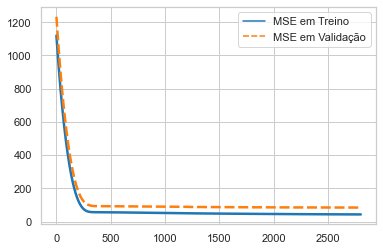

In [25]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [26]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [27]:
# Imprime as previsões
previsoes

array([20.774076, 18.15793 , 23.945745, 21.213327, 20.425253, 20.528608,
       24.591707, 21.83991 , 20.942026, 20.73532 , 26.019281, 23.441893,
       21.168112, 22.699041, 23.261026, 21.529848, 27.253069, 23.364382,
       29.895052, 19.785753, 20.283144, 20.883886, 19.0106  , 20.774076,
       18.765131, 23.532331, 22.85407 , 13.81061 , 16.898302, 36.08982 ,
       21.400656, 17.983519, 19.837431, 22.783014, 32.14946 , 24.385   ,
       21.736555, 28.357664, 25.91593 , 32.860016, 27.89903 , 31.148218,
       32.717903, 16.898302, 23.060778, 23.286867, 18.119173, 23.577547,
       38.215042, 36.238396, 17.906004, 35.585976, 31.671446, 26.08388 ,
       23.67444 , 22.783014, 26.309965, 28.163874, 24.817793, 24.410837,
       23.17705 , 18.862028, 23.428976, 22.789473, 20.987242, 20.069975,
       21.129354, 22.117674, 21.568605, 21.471712, 27.311205, 24.940527,
       10.206142, 13.513468, 16.80787 , 23.364382, 17.214827, 17.718676,
       23.403135, 21.413576, 20.076433, 26.129095, 